In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors

In [47]:
# Load the data
file_path = '/home/69a75dc5-ad63-486d-8dbd-271a53b9786b/NOC INCIDENTS.xlsx'  # Use forward slashes or raw string to avoid escape characters
data = pd.read_excel(file_path)

In [48]:
# Convert 'Open Time' and 'Resolved Time' to datetime
data['Open Time'] = pd.to_datetime(data['Open Time'])
data['Resolved Time'] = pd.to_datetime(data['Resolved Time'])

In [51]:
# Extract day, month, and year from 'Open Time'
data['Year'] = data['Open Time'].dt.year
data['Month'] = data['Open Time'].dt.month
data['Day'] = data['Open Time'].dt.day

In [66]:
# Filter data for the last few months to show the current trend
recent_months_data = data[(data['Open Time'] >= '2024-01-01') & (data['Open Time'] < '2024-07-01')]

In [68]:
# Group by 'Year', 'Month', 'Day', 'Area', and 'Subcategory' to see the number of incidents
daily_trends = recent_months_data.groupby(['Year', 'Month', 'Day', 'Area', 'Subcategory']).size().reset_index(name='Incident Count')

In [70]:
# Convert the 'Year', 'Month', and 'Day' back to a datetime for plotting
daily_trends['Date'] = pd.to_datetime(daily_trends[['Year', 'Month', 'Day']])

In [72]:
# Define the custom colors for the colormap
colors = ['green', 'yellow', 'red']
cmap = mcolors.ListedColormap(colors)

In [61]:
# Define the custom colors for the colormap
colors = ['green', 'yellow', 'red']
cmap = mcolors.ListedColormap(colors)

In [74]:
# Function to plot heatmap for a specific month
def plot_monthly_heatmap(month):
    monthly_data = daily_trends[daily_trends['Month'] == month]
    pivot_table = monthly_data.pivot_table(index='Subcategory', columns='Day', values='Incident Count', fill_value=0)

    plt.figure(figsize=(15, 10))
    sns.heatmap(pivot_table, annot=True, cmap=cmap, linewidths=.5)

    month_name = pd.to_datetime(f'2024-{month:02d}-01').strftime('%B')
    plt.title(f'Heatmap of Daily Incident Count for {month_name} 2024')
    plt.xlabel('Day of the Month')
    plt.ylabel('Subcategory')
    plt.xticks(rotation=45)
    plt.show()

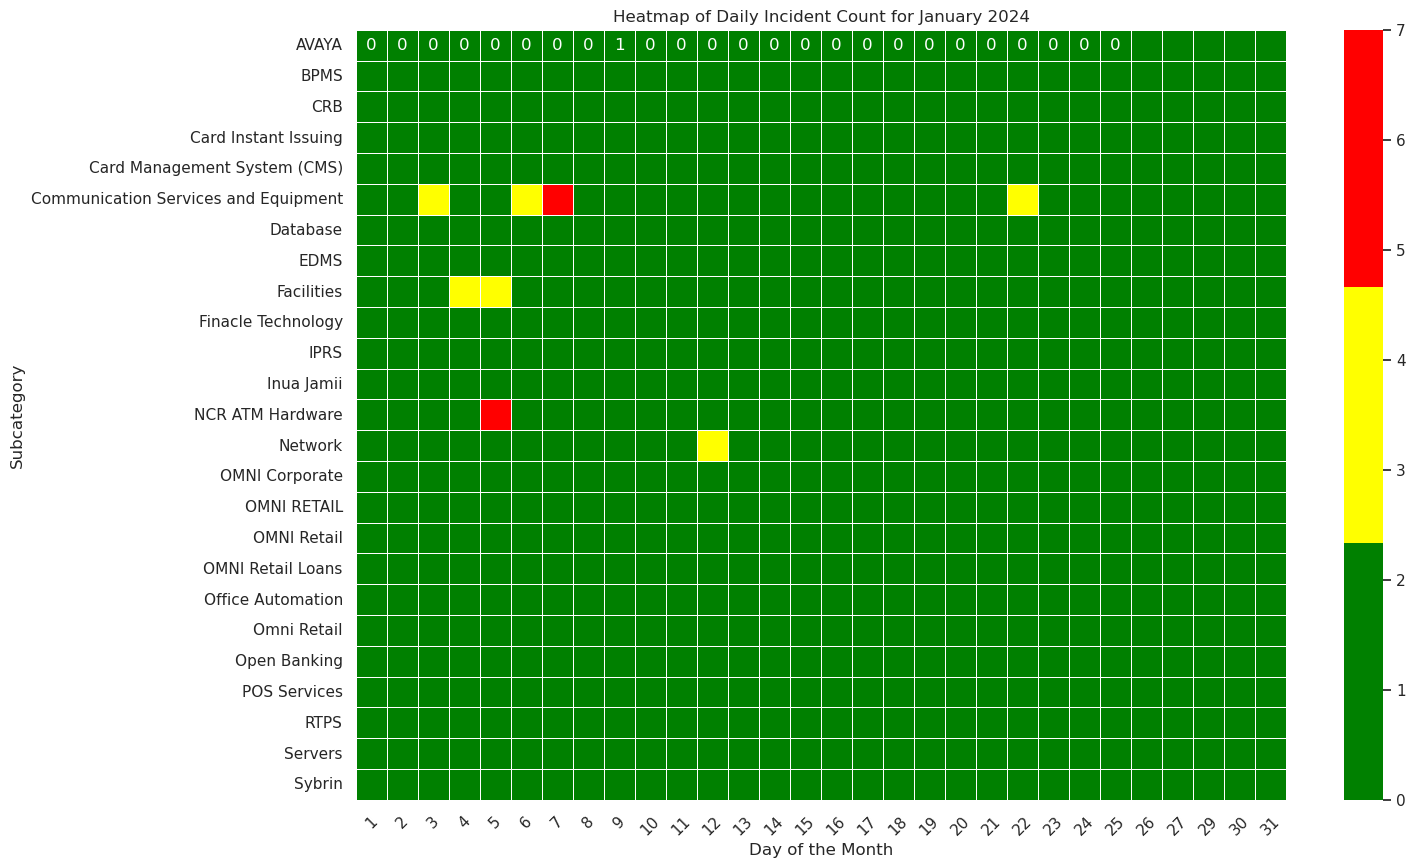

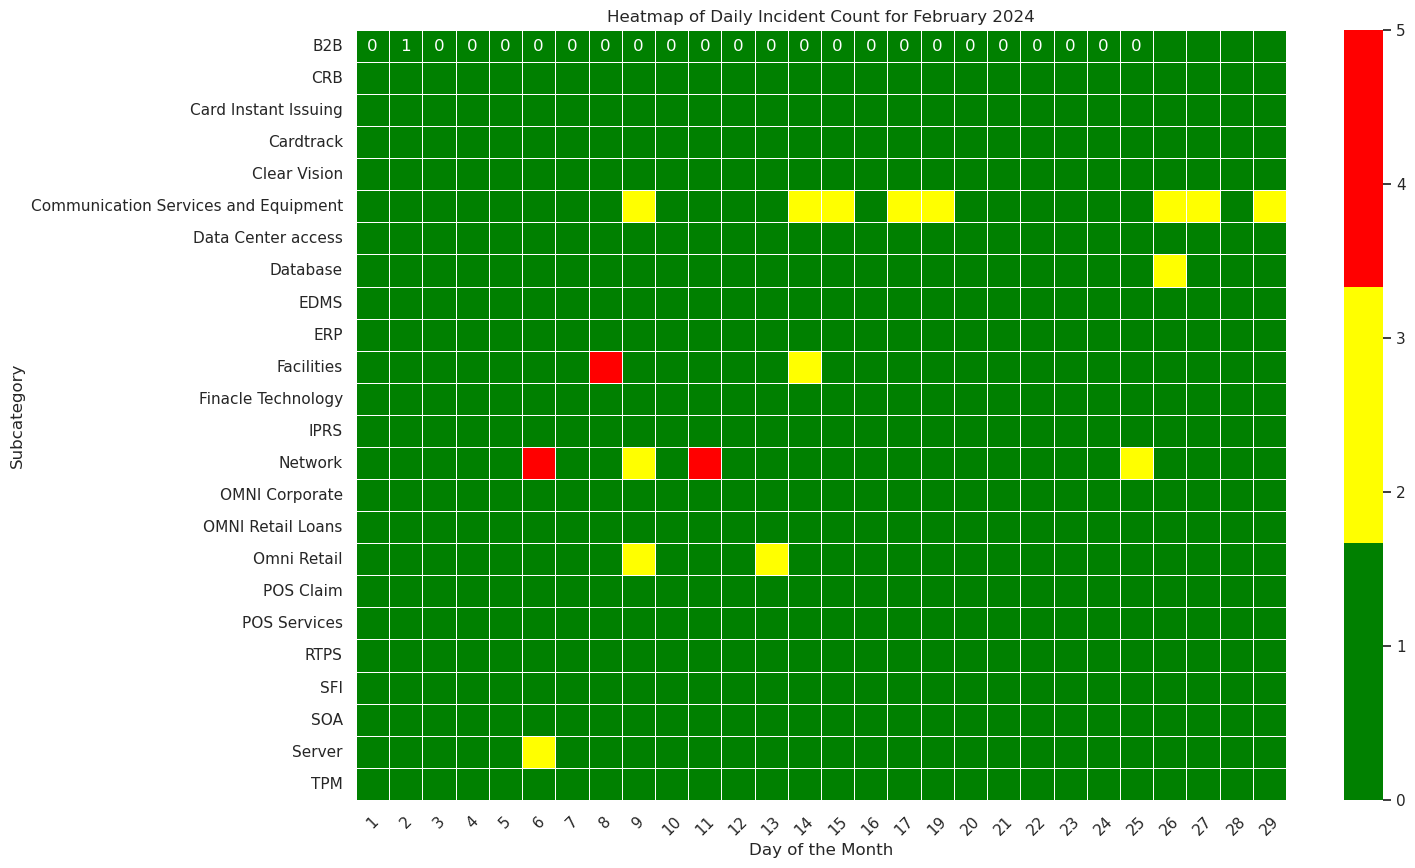

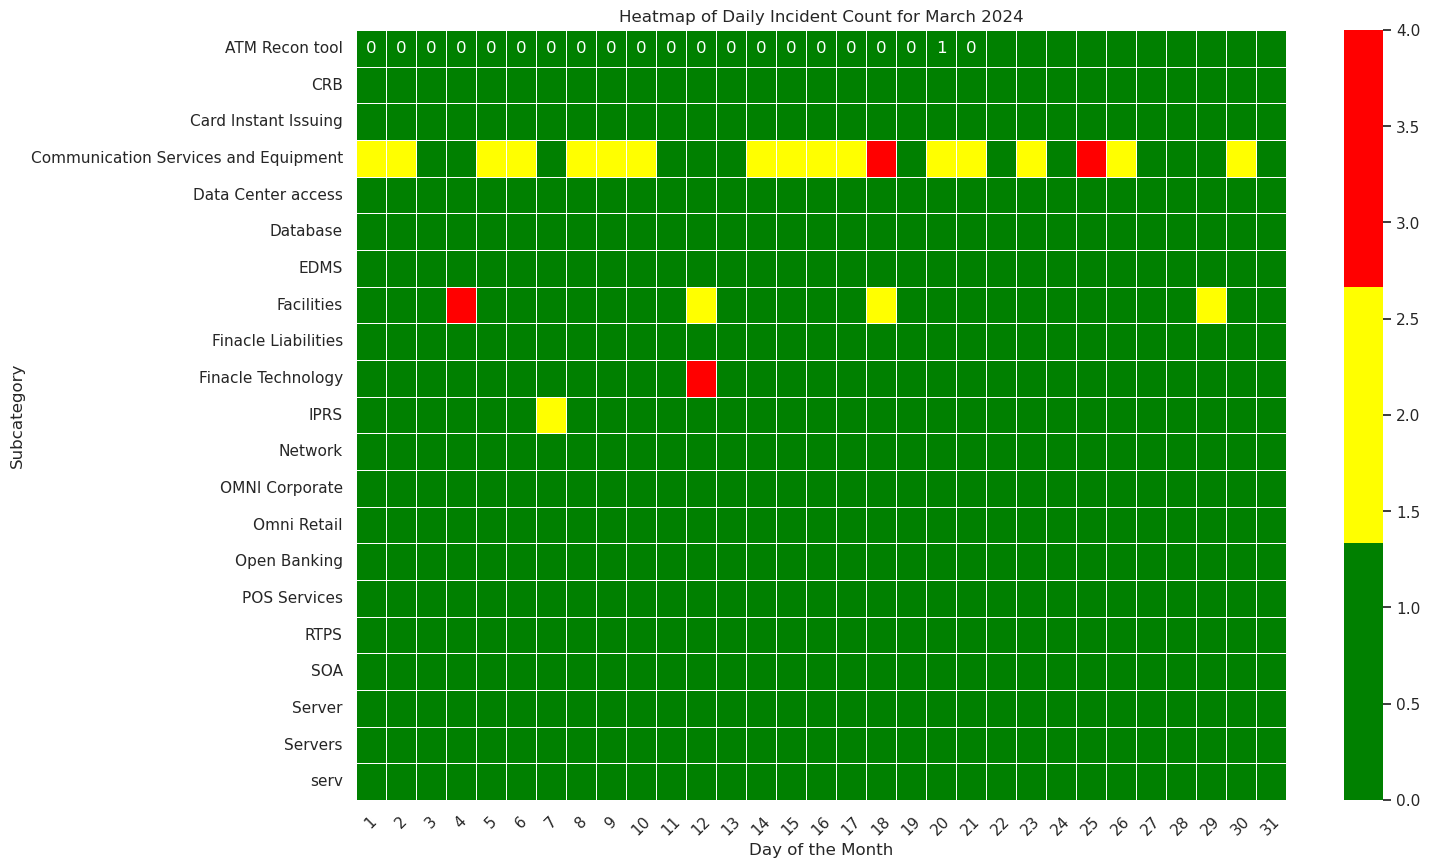

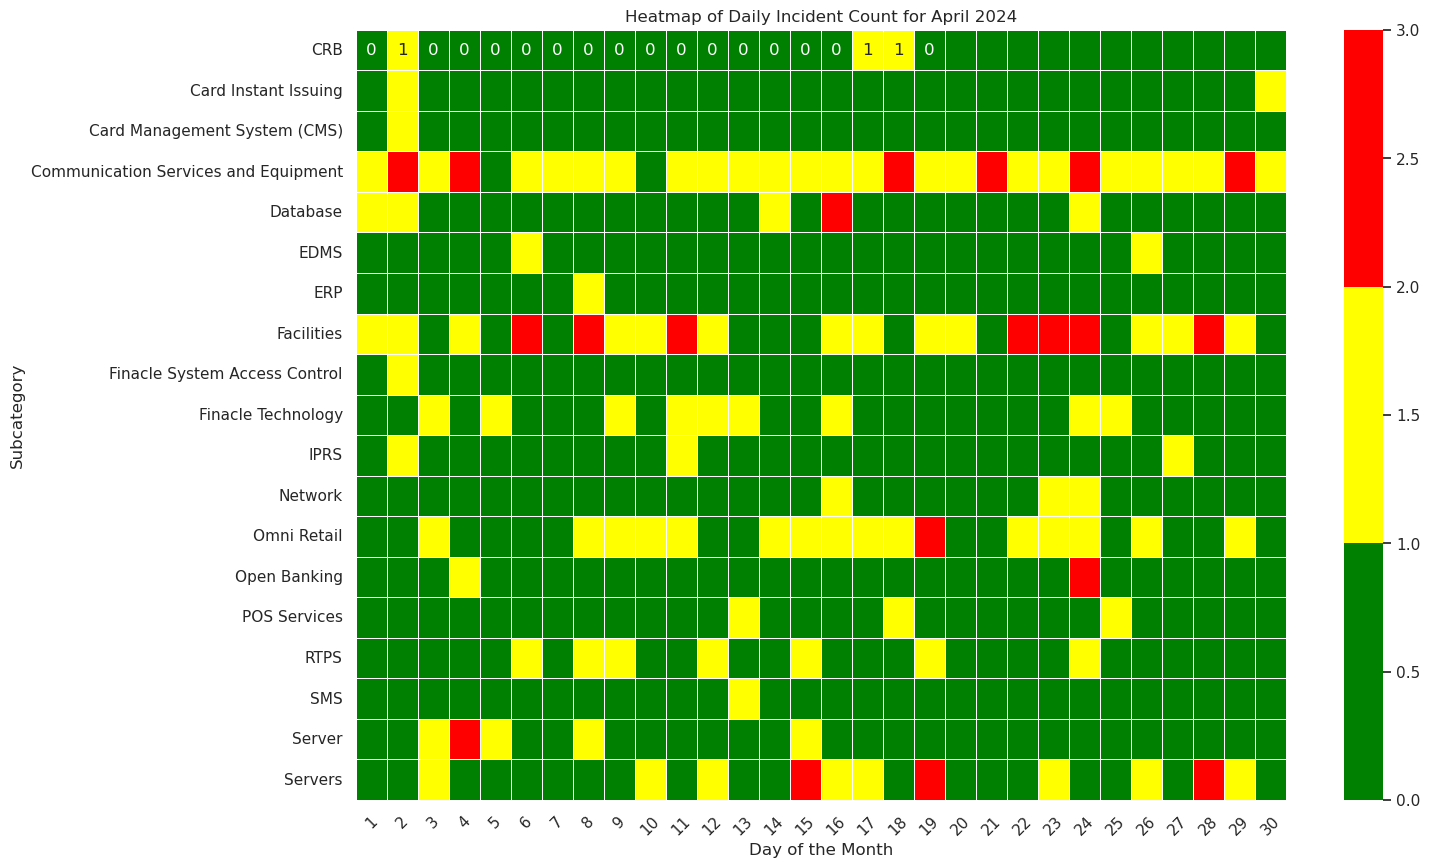

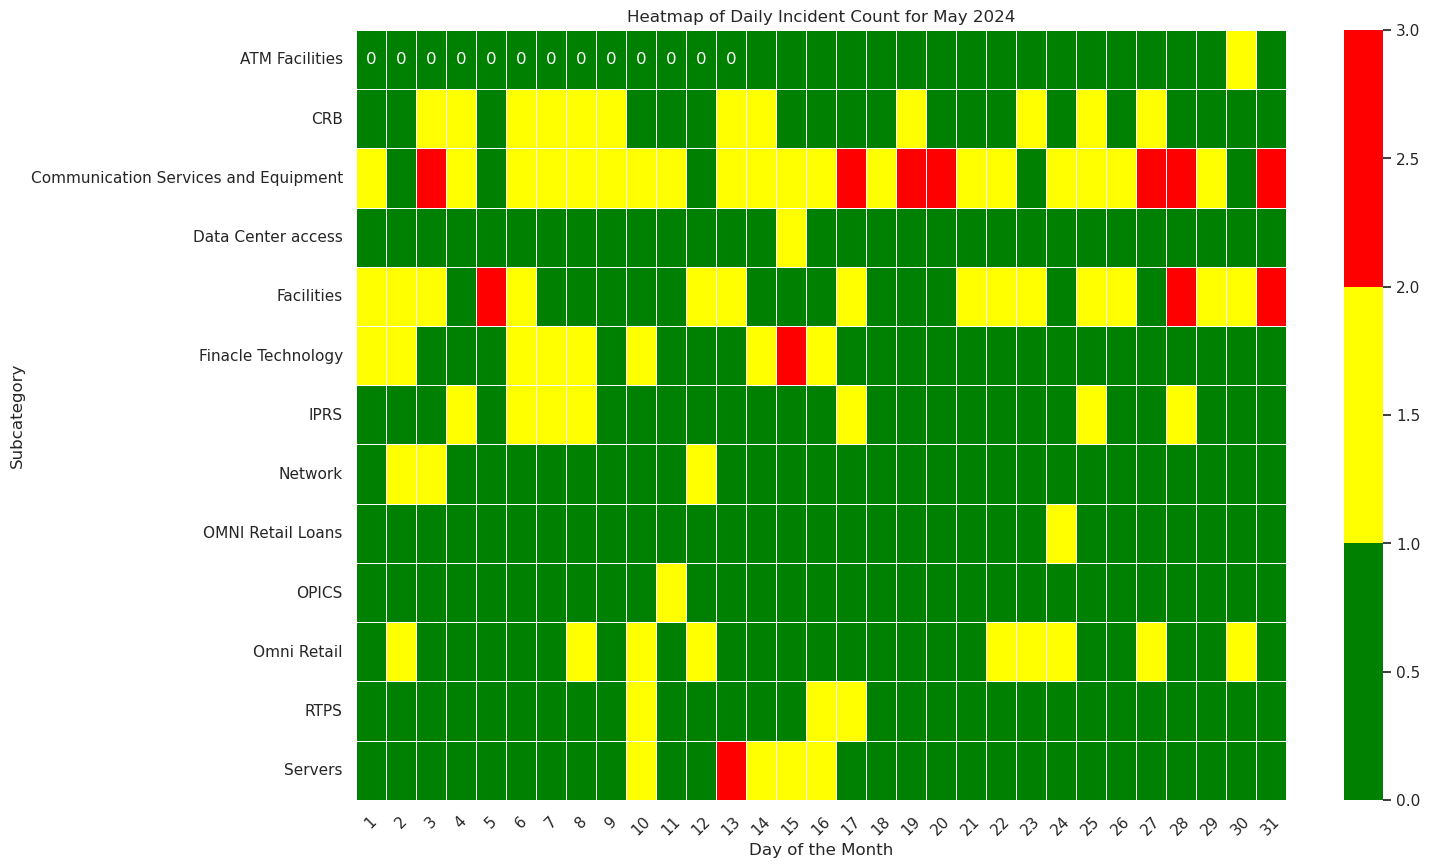

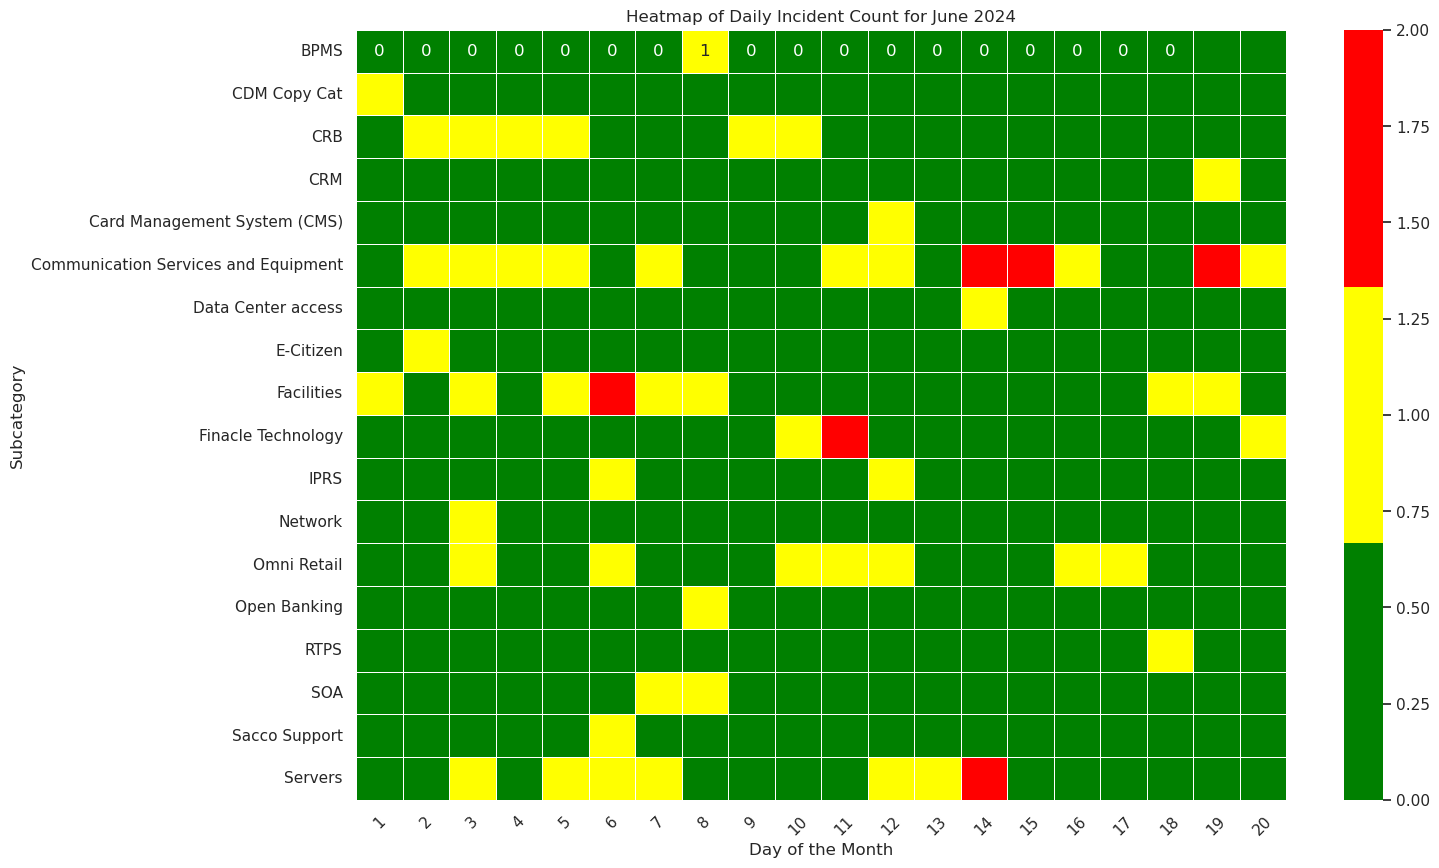

In [76]:
# Plot heatmaps for each month from January to June
for month in range(1, 7):
    plot_monthly_heatmap(month)